In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

data = pd.read_csv('tweets_v8.csv')
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


In [5]:
data= data[:10]
data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False
5,Peyman 🅚🅐🅘,United Kingdom,Official @KardiaChain $KAI Ambassador\nMarketi...,2018-01-27 12:07:31+00:00,546,318,6265,False,2021-10-06 12:04:54+00:00,$THG\nGoing to explode to 4B Marketcap very so...,Twitter for Android,False
6,Aeriaaaa♡,NaN,Fujoshi 🙈/ Thai BL-obsessed/Always distracted ...,2021-06-01 14:08:10+00:00,14,110,518,False,2021-10-06 12:04:45+00:00,@B_hundred_Hyun pls use that gun on me. 😩 \n\n...,Twitter for Android,False
7,BarBiE Fábregas 🇿🇦,South Africa,Legal Administrator👩🏾‍💻|Soccer Fanatic⚽️ #Dail...,2011-03-28 18:56:28+00:00,1877,2057,33186,False,2021-10-06 12:04:26+00:00,Please vote in my daily poll. \nThanks. 😊\n\nD...,Twitter for iPhone,False
8,Joel D. Parker,NaN,Ph.D. in history of 20th century Levant. Somet...,2010-07-01 07:26:44+00:00,621,1346,5345,False,2021-10-06 12:04:22+00:00,I've seen bi-lingual Korean speakers slam the ...,Twitter Web App,False
9,Kevin Franco,"Calgary, Canada",When it comes to describing myself in a one li...,2009-05-11 20:14:51+00:00,1027,278,20902,False,2021-10-06 12:04:10+00:00,I discovered English audio after 5 episodes of...,Twitter Web App,False


In [7]:
review= data['text'] 
review

0    When life hits and the same time poverty strik...
1    That marble episode of #SquidGame  ruined me. 😭😭😭
2                                      #Squidgame time
3    //Blood on 1st slide\nI'm joining the squidgam...
4    The two first games, players were killed by th...
5    $THG\nGoing to explode to 4B Marketcap very so...
6    @B_hundred_Hyun pls use that gun on me. 😩 \n\n...
7    Please vote in my daily poll. \nThanks. 😊\n\nD...
8    I've seen bi-lingual Korean speakers slam the ...
9    I discovered English audio after 5 episodes of...
Name: text, dtype: object

In [9]:
utterances = []
for review_text in review:
    utterances.extend(re.split('[.,;?!]|\b(?:but|and)\b', review_text))

# Clean up any white spaces or extra spaces
utterances = [utterance.strip() for utterance in utterances if utterance.split()]

# Display utterances
utterances



['When life hits and the same time poverty strikes you\nGong Yoo : Lets play a game \n#SquidGame #Netflix https://t',
 'co/Cx7ifmZ8cN',
 'That marble episode of #SquidGame  ruined me',
 '😭😭😭',
 '#Squidgame time',
 "//Blood on 1st slide\nI'm joining the squidgame thing",
 "I'm already dead by sugar honeycomb ofc\n\n#SquidGame… https://t",
 'co/N4UGv9hxx8',
 'The two first games',
 'players were killed by the mask guys',
 'the bloody night and the third game',
 'they killed each o… https://t',
 'co/Qf057XDJ7C',
 '$THG\nGoing to explode to 4B Marketcap very soon',
 'The world first MOBA\nThis game is on another level',
 '@KardiaChain… https://t',
 'co/4Y2bO088JM',
 '@B_hundred_Hyun pls use that gun on me',
 '😩 \n\n#BAEKHYUN #EXO #weareoneEXO #SquidGame https://t',
 'co/kskiH0GRHn',
 'Please vote in my daily poll',
 'Thanks',
 '😊\n\nDo you think Donny van de Beek should leave Manchester United',
 'Yes OR No',
 '… https://t',
 'co/9CnadB5iYo',
 "I've seen bi-lingual Korean speakers slam the

In [11]:
#step 2: display each utterance
for i, utterance in enumerate(utterances, 1):
    print(f'Utterance {i}: {utterance}')

Utterance 1: When life hits and the same time poverty strikes you
Gong Yoo : Lets play a game 
#SquidGame #Netflix https://t
Utterance 2: co/Cx7ifmZ8cN
Utterance 3: That marble episode of #SquidGame  ruined me
Utterance 4: 😭😭😭
Utterance 5: #Squidgame time
Utterance 6: //Blood on 1st slide
I'm joining the squidgame thing
Utterance 7: I'm already dead by sugar honeycomb ofc

#SquidGame… https://t
Utterance 8: co/N4UGv9hxx8
Utterance 9: The two first games
Utterance 10: players were killed by the mask guys
Utterance 11: the bloody night and the third game
Utterance 12: they killed each o… https://t
Utterance 13: co/Qf057XDJ7C
Utterance 14: $THG
Going to explode to 4B Marketcap very soon
Utterance 15: The world first MOBA
This game is on another level
Utterance 16: @KardiaChain… https://t
Utterance 17: co/4Y2bO088JM
Utterance 18: @B_hundred_Hyun pls use that gun on me
Utterance 19: 😩 

#BAEKHYUN #EXO #weareoneEXO #SquidGame https://t
Utterance 20: co/kskiH0GRHn
Utterance 21: Please vote in

In [13]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
# function for preprocessing
def preprocess_utterance(utterance):
    #tokenize the utterance
    tokens = word_tokenize(utterance.lower())

    #remove stop words and keep alphanumeric tokens
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    return tokens
#apply preprocessing to each utterance
processed_utterance = [ preprocess_utterance(utterance) for utterance in utterances]
processed_utterance = [sublist for sublist in processed_utterance if sublist]

#display the process utterances 
print(processed_utterance)

[['life', 'hits', 'time', 'poverty', 'strikes', 'gong', 'yoo', 'lets', 'play', 'game', 'squidgame', 'netflix', 'https'], ['marble', 'episode', 'squidgame', 'ruined'], ['squidgame', 'time'], ['1st', 'slide', 'joining', 'squidgame', 'thing'], ['already', 'dead', 'sugar', 'honeycomb', 'ofc', 'https'], ['two', 'first', 'games'], ['players', 'killed', 'mask', 'guys'], ['bloody', 'night', 'third', 'game'], ['killed', 'https'], ['thg', 'going', 'explode', '4b', 'marketcap', 'soon'], ['world', 'first', 'moba', 'game', 'another', 'level'], ['https'], ['pls', 'use', 'gun'], ['baekhyun', 'exo', 'weareoneexo', 'squidgame', 'https'], ['please', 'vote', 'daily', 'poll'], ['thanks'], ['think', 'donny', 'van', 'de', 'beek', 'leave', 'manchester', 'united'], ['yes'], ['https'], ['seen', 'korean', 'speakers', 'slam', 'squidgame', 'translation'], ['could', 'feel', 'quality', 'writing', 'https'], ['discovered', 'english', 'audio', '5', 'episodes', 'squid', 'game', 'korean', 'subtitles'], ['used', 'watchin

In [92]:
#NOTE:SENTENCED UTTERANCES!
#print(processed_utterance)

joined_list = [" ".join(sublist) for sublist in processed_utterance]
(joined_list)



['life hits time poverty strikes gong yoo lets play game squidgame netflix https',
 'marble episode squidgame ruined',
 'squidgame time',
 '1st slide joining squidgame thing',
 'already dead sugar honeycomb ofc https',
 'two first games',
 'players killed mask guys',
 'bloody night third game',
 'killed https',
 'thg going explode 4b marketcap soon',
 'world first moba game another level',
 'https',
 'pls use gun',
 'baekhyun exo weareoneexo squidgame https',
 'please vote daily poll',
 'thanks',
 'think donny van de beek leave manchester united',
 'yes',
 'https',
 'seen korean speakers slam squidgame translation',
 'could feel quality writing https',
 'discovered english audio 5 episodes squid game korean subtitles',
 'used watching foreign https']

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


utterances = joined_list
sentiment = [1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1]

data = {"Utterances":utterances,"Sentiment":sentiment}
df = pd.DataFrame(data)
df



,Utterances,Sentiment
0,life hits time poverty strikes gong yoo lets p...,1
1,marble episode squidgame ruined,0
2,squidgame time,1
3,1st slide joining squidgame thing,1
4,already dead sugar honeycomb ofc https,0
5,two first games,1
6,players killed mask guys,0
7,bloody night third game,0
8,killed https,0
9,thg going explode 4b marketcap soon,1


In [203]:
vectorizer = TfidfVectorizer(stop_words = 'english')
x = vectorizer.fit_transform(df['Utterances'])
y = df['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 41)

# ## train logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

 ## predict on test data
y_pred = model.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.80


In [199]:
# test on new utterances
test_utterances =["Squid game is boring",
"I adsdad",
"Squid game is too violent for me",
"The plot of squid game is confusing",
"I couldn't finish watching squid",
 'players killed mask guys',
 'Im excited to watch squid game with my friends',
 'Squid game was released in 2021',
 'killed https',
 'world first moba game another level',
 'Must watch',
 'Im rooting for the underdog in Cavs',
 'The director of A good day to be a dawg isme',
 'Squid game is available on Netflix',
 'Dead!',
 'Squid game is too gory for me',
 'Im impressed by the cinematography in squid game',
 'Farcry is too slow paced',
 'Squid game is a popular Korean drama',
 'I dont understand the hype around squid game',
 'Im glad squid game is getting so much attention',
 'Not valid',
 'Squid game is so exciting I cant stop sleeping']

test_utterances_tfidf= vectorizer.transform(test_utterances)
predictions = model.predict(test_utterances_tfidf)

print("Sentiment Predictions: ", predictions)

Sentiment Predictions:  [1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1]


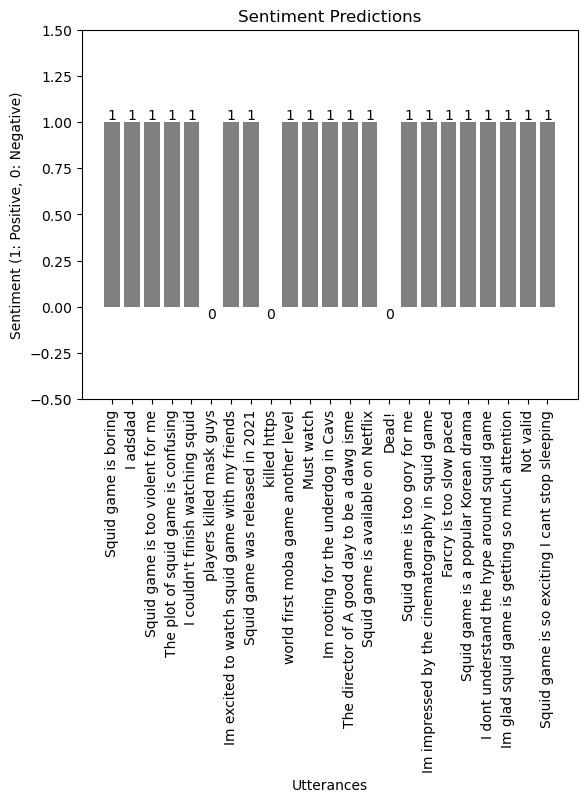

In [201]:
colors = ['gray' if pred == 1 else 'red' for pred in predictions]
bar = plt.bar(test_utterances,predictions, color=colors)
plt.title('Sentiment Predictions')
plt.xlabel('Utterances')
plt.ylabel('Sentiment (1: Positive, 0: Negative)')
plt.ylim(-0.5,1.5)
plt.xticks(rotation=90)

for bar, pred in zip(bar, predictions):
    plt.text(bar.get_x() + bar.get_width() /2, bar.get_height(), str(pred),
             ha='center', va='bottom' if pred == 1 else 'top')
plt.show()